In [57]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
vinos = datasets.load_wine()

In [22]:
x = pd.DataFrame(vinos.data, columns = vinos.feature_names)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
y = pd.DataFrame(vinos.target, columns = ['target'])

When I make a boxplot to some columns, we can see that there are some with outliers like 'magnesium'

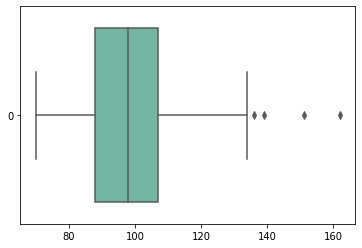

In [55]:
ax = sns.boxplot(data=x['magnesium'], orient="h", palette="Set2")

There are many types of scaling that we can use, in this case, I mention four types:
1) StandarScaler - It's NOT recommended when you have outliers
2) RobustScaler - Is recommended when you have outliers
3) MinMaxScaler - It's NOT recommended when you have outliers
4) MaxAbsScaler - It's NOT recommended when you have outliers
As you can see, only have one option (RobustScaler), this scaling is based on the median

In [52]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(x)
x_scaled = scaler.transform(x)

In [53]:
x_new = pd.DataFrame(x_scaled, columns = vinos.feature_names)
x_new

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050
1,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090
2,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728
3,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603
4,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.501901,2.557432,0.258993,0.232558,-0.157895,-0.638298,-0.913174,1.074627,-0.707143,1.010067,-0.962963,-0.843813,0.137255
174,0.266160,1.381757,0.345324,0.813953,0.210526,-0.524823,-0.829341,0.537313,-0.207143,0.875839,-0.785185,-0.989858,0.157895
175,0.167300,1.631757,-0.287770,0.116279,1.157895,-0.723404,-0.865269,0.537313,-0.292857,1.848993,-1.111111,-0.989858,0.333333
176,0.091255,0.489865,0.028777,0.116279,1.157895,-0.666667,-0.871257,1.134328,-0.135714,1.546980,-1.081481,-0.941176,0.343653


[1148.5878233100048, 854.6743315685643, 676.3655316967304, 621.7679990376371, 582.459075353811, 547.3437116851578, 515.3350952111946, 484.3037798417299, 457.63812888496085, 446.8667357129783]


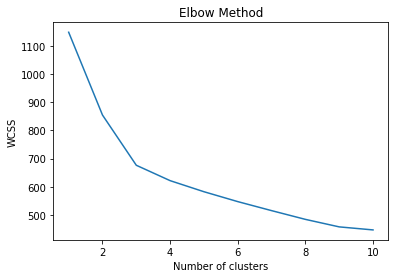

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x_new)
y_labels = model.labels_

In [92]:
y_kmeans = model.predict(x_new)
print(f'Predicciones {y_kmeans}')

Predicciones [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [93]:
# Accuracy calculation
accuracy = metrics.adjusted_rand_score(vinos.target, y_kmeans)
print(accuracy)

0.8950582389649661


Text(0, 0.5, 'Petal Width')

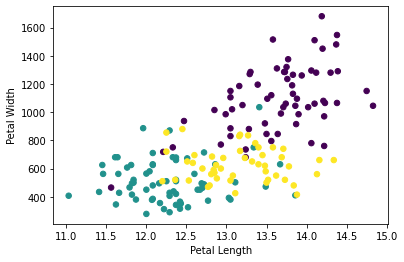

In [72]:
plt.scatter(x['alcohol'], x['proline'], c = y_kmeans, s=30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [70]:
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

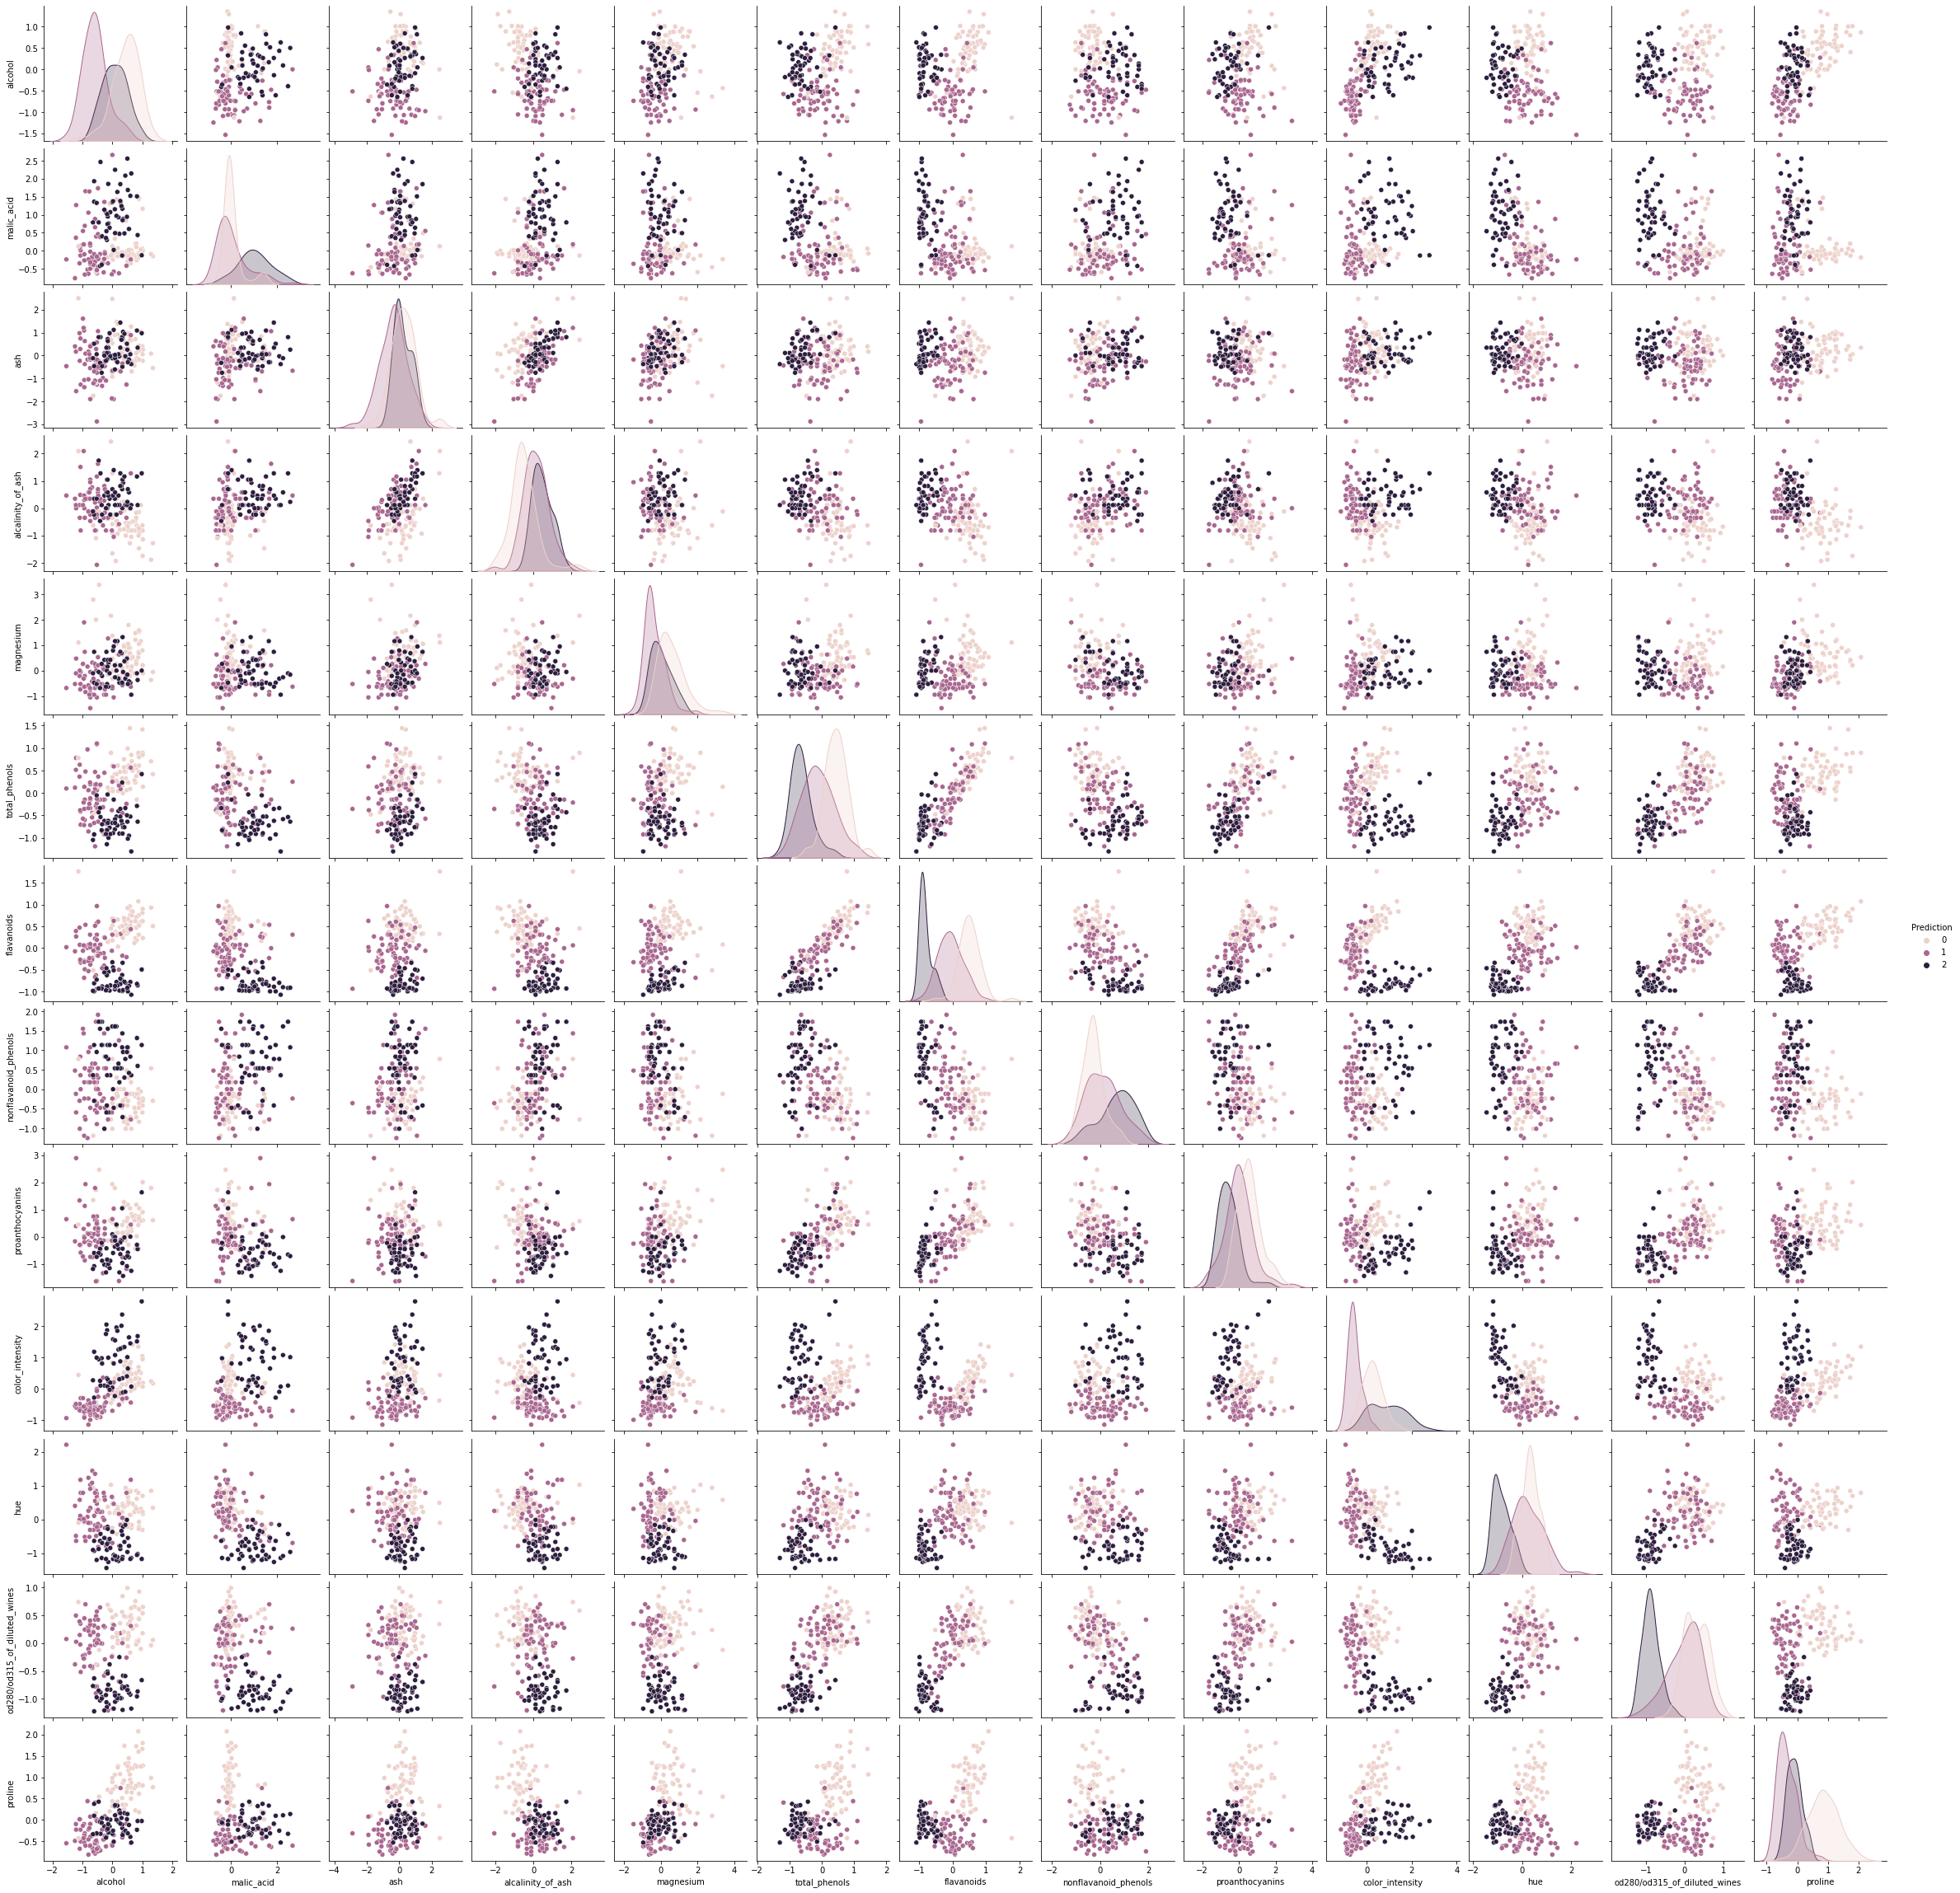

In [74]:
# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([x_new, y_kmeans_df], axis = 1)
# Grafico
sns.pairplot(Z, hue = 'Prediction')